# Predicting customer spending using machine learning

This machine learning model helps predict annual spending of the customers using various Python-based machine learning and data science libraries.

## 1. Problem Definition

> How well can we predict annual spending of the customer by certain parameters?

## 2. Data

The data is available on Kaggle. https://www.kaggle.com/datasets/goyaladi/customer-spending-dataset/data

## 3. Evaluation

> The goal is get MSE value closer to zero.

## 4. Features

1. name - The name of the customer (textual data).
2. age - The age of the customer (numeric data).
3. gender - The gender of the customer (categorical data).
4. education - The highest level of education attained by the customer (categorical data).
5. income - The annual income of the customer (numeric data).
6. country - The country of origin of the customer (textual data).
7. purchase_frequency - The frequency of customer purchases, ranging from 0.1 to 1.0 (numeric data).
8. spending - The annual spending of the customer, calculated based on various factors (numeric data).


In [1]:
# Exploratory data analysis and data visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

# Model evaluations
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
df = pd.read_csv('customer_data.csv')
df.head()

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


In [3]:
# (rows, columns)
df.shape

(1000, 8)

## Data Exploration (exploratory data analysis or EDA)

In [4]:
# Generate descriptive statistics
df.describe()

,age,income,purchase_frequency,spending
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.754000,59277.852000,0.554600,9613.296835
std,13.778582,23258.377128,0.284675,5484.707210
min,18.000000,20031.000000,0.100000,611.985000
25%,30.000000,38825.500000,0.300000,5020.425000
50%,42.000000,58972.000000,0.600000,9430.395000
75%,54.000000,79114.000000,0.800000,13645.507500
max,65.000000,99780.000000,1.000000,25546.500000


In [5]:
# Detect missing values
df.isna().sum()

name                  0
age                   0
gender                0
education             0
income                0
country               0
purchase_frequency    0
spending              0
dtype: int64

In [6]:
# Print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1000 non-null   object 
 1   age                 1000 non-null   int64  
 2   gender              1000 non-null   object 
 3   education           1000 non-null   object 
 4   income              1000 non-null   int64  
 5   country             1000 non-null   object 
 6   purchase_frequency  1000 non-null   float64
 7   spending            1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [7]:
# Count unique values in each column
df.nunique()

name                   991
age                     48
gender                   2
education                4
income                 997
country                239
purchase_frequency      10
spending              1000
dtype: int64

In [8]:
# Return a Series containing counts of unique rows in the DataFrame
df["education"].value_counts()

Bachelor       271
PhD            248
High School    245
Master         236
Name: education, dtype: int64

In [9]:
df["country"].value_counts()

Congo                12
Palau                11
Slovenia             10
Algeria               9
Ukraine               9
                     ..
Equatorial Guinea     1
Solomon Islands       1
Niger                 1
Botswana              1
Sudan                 1
Name: country, Length: 239, dtype: int64

In [10]:
df["gender"].value_counts()

Male      501
Female    499
Name: gender, dtype: int64

In [11]:
df["age"].sort_values(ascending = True)

672    18
863    18
364    18
362    18
135    18
       ..
873    65
508    65
126    65
663    65
281    65
Name: age, Length: 1000, dtype: int64

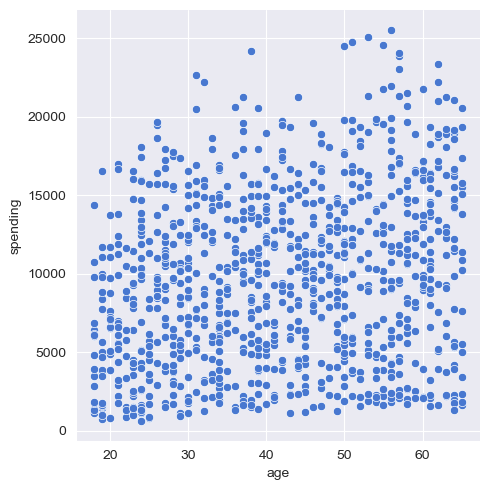

In [12]:
sns.set_style("darkgrid")
sns.set_palette("muted")

sns.relplot(x = "age", y = "spending", data = df)

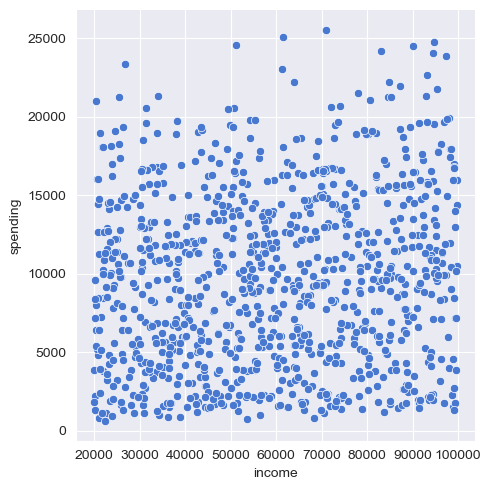

In [13]:
sns.relplot(x = "income", y = "spending", data = df)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11868\2165028973.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr() # Compute pairwise correlation of columns
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11868\2165028973.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),xticklabels=corr.columns, yticklabels=corr.columns,vmin=-1, vmax=1, annot=True)


<Axes: >

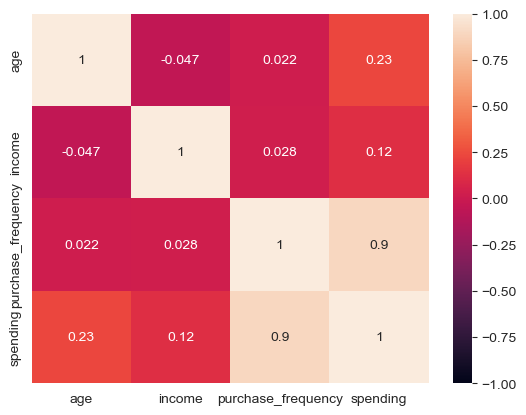

In [14]:
corr=df.corr() # Compute pairwise correlation of columns
sns.heatmap(df.corr(),xticklabels=corr.columns, yticklabels=corr.columns,vmin=-1, vmax=1, annot=True)

> We will drop income column due to negative correlation between age and income.

## 5. Modelling

In [15]:
df

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780
...,...,...,...,...,...,...,...,...
995,Jason Haas,42,Female,PhD,98170,Bosnia and Herzegovina,0.7,17435.950
996,Sharon Valdez,39,Male,High School,59174,Eritrea,0.9,11662.830
997,Andrew Taylor,50,Male,Master,59808,Serbia,0.4,7196.160
998,Jessica Johnson,50,Female,Master,58272,Cyprus,0.7,13939.520


In [16]:
# Convert categorical variable into dummy variables

dummies = pd.get_dummies(df[['gender', 'education']])
dummies

,gender_Female,gender_Male,education_Bachelor,education_High School,education_Master,education_PhD
0,1,0,0,1,0,0
1,1,0,0,0,1,0
2,0,1,1,0,0,0
3,1,0,1,0,0,0
4,0,1,0,0,1,0
...,...,...,...,...,...,...
995,1,0,0,0,0,1
996,0,1,0,1,0,0
997,0,1,0,0,1,0
998,1,0,0,0,1,0


In [17]:
y = df.spending

In [18]:
# Drop the column with the independent variable (spending), and columns which we created dummy variables


X_ = df.drop(['name', 'gender','education','country', 'income', 'spending'], axis = 1).astype('float64') 

# Concatenate X_ with dummy variables

X = pd.concat([X_, dummies[['gender_Female', 'education_Bachelor', 'education_Master', 'education_PhD']]], axis = 1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1000 non-null   float64
 1   purchase_frequency  1000 non-null   float64
 2   gender_Female       1000 non-null   uint8  
 3   education_Bachelor  1000 non-null   uint8  
 4   education_Master    1000 non-null   uint8  
 5   education_PhD       1000 non-null   uint8  
dtypes: float64(2), uint8(4)
memory usage: 19.7 KB


In [19]:
X

,age,purchase_frequency,gender_Female,education_Bachelor,education_Master,education_PhD
0,42.0,0.9,1,0,0,0
1,49.0,0.6,1,0,1,0
2,55.0,0.3,0,1,0,0
3,24.0,0.2,1,1,0,0
4,64.0,0.9,0,0,1,0
...,...,...,...,...,...,...
995,42.0,0.7,1,0,0,1
996,39.0,0.9,0,0,0,0
997,50.0,0.4,0,0,1,0
998,50.0,0.7,1,0,1,0


In [20]:
y

0      13227.120
1      12674.040
2       5354.115
3       2606.510
4      18984.780
         ...    
995    17435.950
996    11662.830
997     7196.160
998    13939.520
999     8312.800
Name: spending, Length: 1000, dtype: float64

In [21]:
# Calculate the logarithm of spending

y = np.log(y)
y

0      9.490025
1      9.447311
2      8.585621
3      7.865767
4      9.851393
         ...   
995    9.766289
996    9.364162
997    8.881303
998    9.542483
999    9.025552
Name: spending, Length: 1000, dtype: float64

## 5. Modelling

We're going to implement 4 machine learning model:

1. Lasso
2. Linear Regression
3. Gradient Boosting Regressor
4. Random Forest Regressor

Firstly, we will split our data into training and test set. We need to standardize the data (μ = 0, σ = 1) that is typically used before we integrate it into the machine learning model.

In [22]:
# Split the data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [23]:
# Create a pipeline

pipe = Pipeline([('scaler', preprocessing.StandardScaler()),('Regressor',LinearRegression())])

# Create space of candidate learning algorithms and their hyperparameters

gridsearch = [{'Regressor': [Lasso(max_iter = 10000)],
               'Regressor__alpha': np.logspace(-3, 1, 10)},
              {'Regressor': [LinearRegression()]},
              {'Regressor': [GradientBoostingRegressor(random_state = 10)],
               'Regressor__n_estimators': [100,1000,5000,10000],
               'Regressor__learning_rate':[1,0.1,0.01,0.001]},
              {'Regressor': [RandomForestRegressor(random_state = 0)],
               'Regressor__n_estimators': [100, 200,300,400,500],
               'Regressor__max_features': [3,4,5,6]}]

# Create grid search 

gridsearch = GridSearchCV(pipe, gridsearch, cv=5, verbose=0,scoring='neg_mean_squared_error')

# Fit grid search

best_model = gridsearch.fit(X_train, y_train)

# Get the best model and parameters

best_model.best_estimator_.get_params()['Regressor']

GradientBoostingRegressor(learning_rate=0.001, n_estimators=10000,
                          random_state=10)

In [24]:
model = GradientBoostingRegressor(learning_rate=0.001, n_estimators=10000, random_state=10)
model.fit(X_trainStandard, y_train)




GradientBoostingRegressor(learning_rate=0.001, n_estimators=10000,
                          random_state=10)

In [25]:
# Make predictions with tuned model

y_pred = model.predict(X_testStandard)
y_pred


array([ 8.63035912,  9.70136104,  8.18064332,  7.68972471,  8.46560182,
        9.69721992,  8.68359018,  9.36438721,  9.31254285,  9.28486737,
        9.19378047,  7.54102399,  8.0444951 ,  8.32793164,  9.54457916,
        9.06639393,  9.1743752 ,  9.53299338,  7.33074098,  9.20394029,
        7.75983851,  9.26454457,  8.98659235,  7.11183895,  9.79533124,
        8.46401378,  9.88709883,  9.66719938,  9.50062357,  9.43922651,
        8.24497401,  9.04566673,  8.56076434,  8.28208436,  9.6760785 ,
        8.33055752,  9.15838228,  9.36422619,  9.88638937,  9.85514935,
        9.03298357,  7.48653535,  9.45167636,  8.86779396,  8.22634593,
        7.42700879,  9.7017632 ,  9.42856015,  9.34820632,  8.40413264,
        8.00199048,  7.81071356,  9.89675449,  7.62037707,  9.68147117,
        9.18014504,  9.61875068,  9.18103615,  9.77402226,  8.70487871,
        6.729649  ,  9.49663848,  9.18917597,  9.43331031,  8.17400019,
        9.62787843,  9.13161063,  9.06323311,  9.54009425,  9.77

In [26]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.0070288669524288215


## Evaluating our model, beyond mean squared error

* R2 score
* Mean Absolute Error (MAE)
* Root Mean Square Error (RMSE)

In [27]:
print('R2:',metrics.r2_score(y_test, y_pred))

R2: 0.9874466886317079


In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.06358192795147838


In [29]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 0.08383833820173693
